In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx

In [2]:
from qiskit.optimization.applications.ising import max_cut
from qiskit.aqua.algorithms.minimum_eigen_solvers.qaoa.var_form import QAOAVarForm
from qiskit import Aer, execute

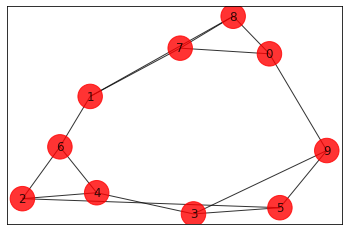

In [3]:
n=10# Number of nodes in graph
regular=None # Use a regular graph where each node is connected to m other nodes. Set to None to manually specify the desired connectivity.
m= None # Specify a number of edges which will be randomly connected to nodes
weighted = True
if m is not None:
    G=nx.gnm_random_graph(n, m)
elif regular is not None:
    G=nx.random_regular_graph(regular,n)
else:
    G=nx.Graph()
    G.add_nodes_from(np.arange(0,n,1))
rand = []
if weighted:
    for i in range(0,len(G.edges.data())):
        temp = np.random.uniform(0.0, 2.0)
        rand.append(temp)
else:
    for i in range(0,len(G.edges.data())):
        temp = 1.0
        rand.append(temp)

e_gen=[]
k=0
first_edges=[]
second_edges=[]
if regular is not None:
    for i in list(G.edges):
        first_edges.append(i[0])
        second_edges.append(i[1])
    for i,j in zip(first_edges,second_edges):   
        e_gen.append((i,j,rand[k]))
        k+=1
    elist=e_gen
    G.add_weighted_edges_from(elist)
else:
    elist= [(0, 7, 1.5181502391729558),
 (0, 9, 0.331312208155327),
 (0, 8, 1.2833944055514492),
 (1, 7, 1.0661996037560515),
 (1, 6, 1.947660542850257),
 (1, 8, 0.03125024211772787),
 (2, 4, 1.3410941997695383),
 (2, 6, 0.7392791251861703),
 (2, 5, 0.08469755597757378),
 (3, 4, 1.4591465162133246),
 (3, 9, 0.15168676101679557),
 (3, 5, 1.347479245892892),
 (4, 6, 1.6623000492714244),
 (5, 9, 0.683986053165548),
 (7, 8, 1.5127167653116929)]
    G.add_weighted_edges_from(elist)
colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)
default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight'] 
qubitOp, offset = max_cut.get_operator(w)

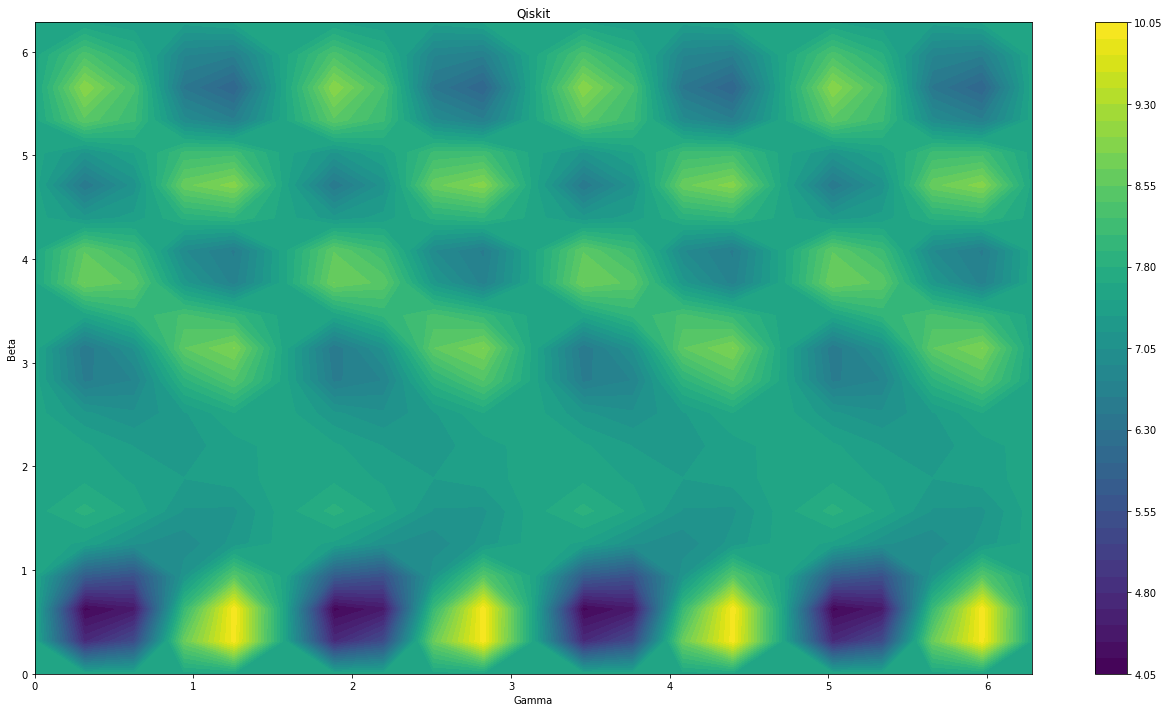

In [4]:
fix_gammas=2*np.pi*np.arange(0,1.01,0.05) 
fix_betas=2*np.pi*np.arange(0,1.01,0.05)
X, Y = np.meshgrid(fix_gammas,fix_betas)
ene2={}
Z={}
ene={}
for i in fix_gammas:
    for j in fix_betas:       
        qc1=QAOAVarForm(qubitOp.to_opflow(),p=1,initial_state=None).construct_circuit([i,j])
        ex1=execute(qc1,backend=Aer.get_backend('statevector_simulator'))
        ene.update({(i,j):qubitOp.evaluate_with_statevector(ex1.result().get_statevector())[0].real})
n_steps=len(np.arange(0,1.01,0.05))
ene2=[]
for i in range(0,len(fix_gammas)):
    ene2.append(np.array(list(ene.values())[n_steps*i:n_steps*(i+1)]))
fig,ax2=plt.subplots(figsize=(18,10))
Z = np.array(-(ene2+offset))
cp = ax2.contourf(X,Y,Z,levels=49)
fig.colorbar(cp) # Add a colorbar to a plot
ax2.set_xlabel('Gamma')
ax2.set_ylabel('Beta')
ax2.set_title('Qiskit')
fig.tight_layout()

In [7]:
Z.T[:2]

array([[7.58017676, 7.58017676, 7.58017676, 7.58017676, 7.58017676,
        7.58017676, 7.58017676, 7.58017676, 7.58017676, 7.58017676,
        7.58017676, 7.58017676, 7.58017676, 7.58017676, 7.58017676,
        7.58017676, 7.58017676, 7.58017676, 7.58017676, 7.58017676,
        7.58017676],
       [7.58017676, 4.76505952, 4.14116957, 5.78210384, 7.47119111,
        7.8500275 , 7.61159872, 7.52693735, 7.22929748, 6.56562693,
        6.47898631, 7.54138365, 8.7009992 , 8.53842775, 7.24674247,
        6.45957381, 7.16675296, 8.50947126, 8.98370575, 8.32509552,
        7.49933576]])

    ## old qiskit

In [7]:
from qiskit.optimization.ising.max_cut import get_operator as get_maxcut_operator
from qiskit.aqua.algorithms.adaptive.qaoa.var_form import QAOAVarForm
from qiskit import Aer, execute

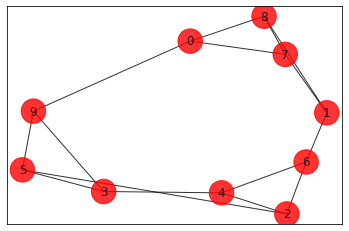

In [9]:
n=10# Number of nodes in graph
regular=None # Use a regular graph where each node is connected to m other nodes. Set to None to manually specify the desired connectivity.
m= None # Specify a number of edges which will be randomly connected to nodes
weighted = True
if m is not None:
    G=nx.gnm_random_graph(n, m)
elif regular is not None:
    G=nx.random_regular_graph(regular,n)
else:
    G=nx.Graph()
    G.add_nodes_from(np.arange(0,n,1))
rand = []
if weighted:
    for i in range(0,len(G.edges.data())):
        temp = np.random.uniform(0.0, 2.0)
        rand.append(temp)
else:
    for i in range(0,len(G.edges.data())):
        temp = 1.0
        rand.append(temp)

e_gen=[]
k=0
first_edges=[]
second_edges=[]
if regular is not None:
    for i in list(G.edges):
        first_edges.append(i[0])
        second_edges.append(i[1])
    for i,j in zip(first_edges,second_edges):   
        e_gen.append((i,j,rand[k]))
        k+=1
    elist=e_gen
    G.add_weighted_edges_from(elist)
else:
    elist= [(0, 7, 1.5181502391729558),
 (0, 9, 0.331312208155327),
 (0, 8, 1.2833944055514492),
 (1, 7, 1.0661996037560515),
 (1, 6, 1.947660542850257),
 (1, 8, 0.03125024211772787),
 (2, 4, 1.3410941997695383),
 (2, 6, 0.7392791251861703),
 (2, 5, 0.08469755597757378),
 (3, 4, 1.4591465162133246),
 (3, 9, 0.15168676101679557),
 (3, 5, 1.347479245892892),
 (4, 6, 1.6623000492714244),
 (5, 9, 0.683986053165548),
 (7, 8, 1.5127167653116929)]
    G.add_weighted_edges_from(elist)
colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)
default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight'] 
qubitOp, offset = get_maxcut_operator(w)

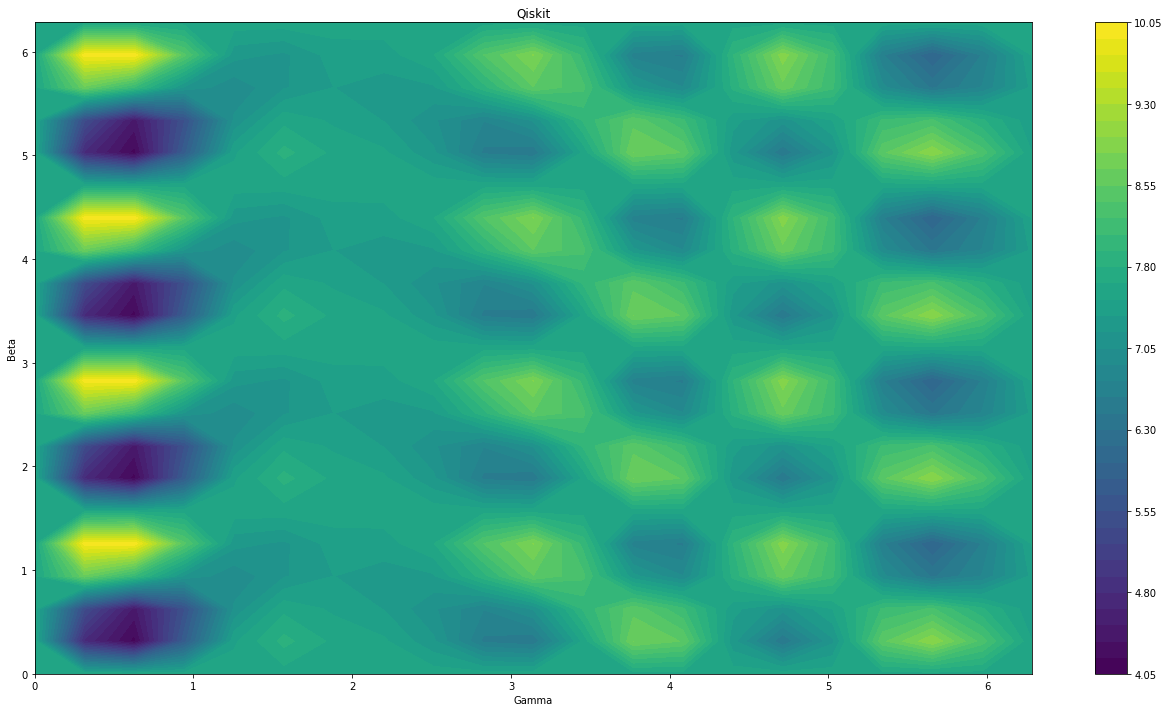

In [11]:
fix_gammas=2*np.pi*np.arange(0,1.01,0.05) 
fix_betas=2*np.pi*np.arange(0,1.01,0.05)
X, Y = np.meshgrid(fix_gammas,fix_betas)
ene2={}
Z={}
ene={}
for i in fix_gammas:
    for j in fix_betas:       
        qc1=QAOAVarForm(qubitOp,p=1,initial_state=None).construct_circuit([i,j])
        ex1=execute(qc1,backend=Aer.get_backend('statevector_simulator'))
        ene.update({(i,j):qubitOp.evaluate_with_statevector(ex1.result().get_statevector())[0].real})
n_steps=len(np.arange(0,1.01,0.05))
ene2=[]
for i in range(0,len(fix_gammas)):
    ene2.append(np.array(list(ene.values())[n_steps*i:n_steps*(i+1)]))
fig,ax2=plt.subplots(figsize=(18,10))
Z = np.array(-(ene2+offset))
cp = ax2.contourf(X,Y,Z,levels=49)
fig.colorbar(cp) # Add a colorbar to a plot
ax2.set_xlabel('Gamma')
ax2.set_ylabel('Beta')
ax2.set_title('Qiskit')
fig.tight_layout()